In [ ]:
!pip install -r requirements.txt

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import requests


class PlotDrawer:
    def __init__(self, data_folder='графики'):
        self.data_folder = data_folder
        if not os.path.exists(data_folder):
            os.makedirs(data_folder)

    def draw_plot(self, x, y, title):
        plt.plot(x, y)
        plt.title(title)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.savefig(os.path.join(self.data_folder, f'{title}.png'))
        plt.close()

def draw_plots(json_file):
    df = pd.read_json(json_file)
    plot_drawer = PlotDrawer()

    paths = []
    for column in df.columns:
        plot_drawer.draw_plot(df.index, df[column], column)
        paths.append(os.path.join(plot_drawer.data_folder, f'{column}.png'))

    return paths

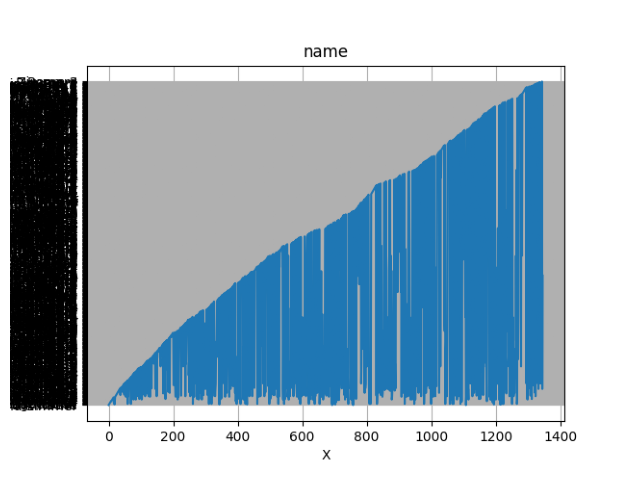

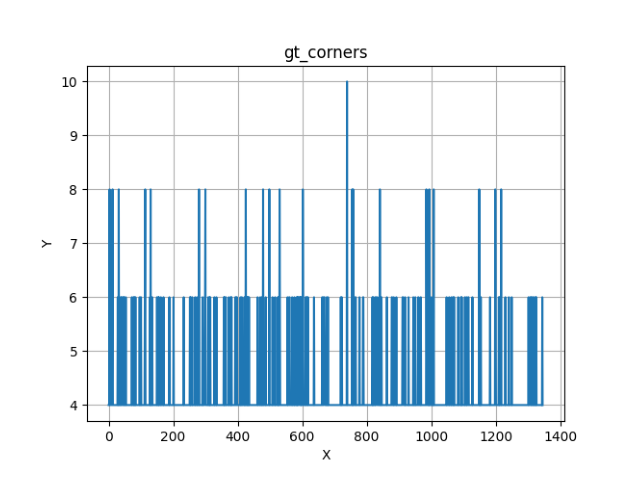

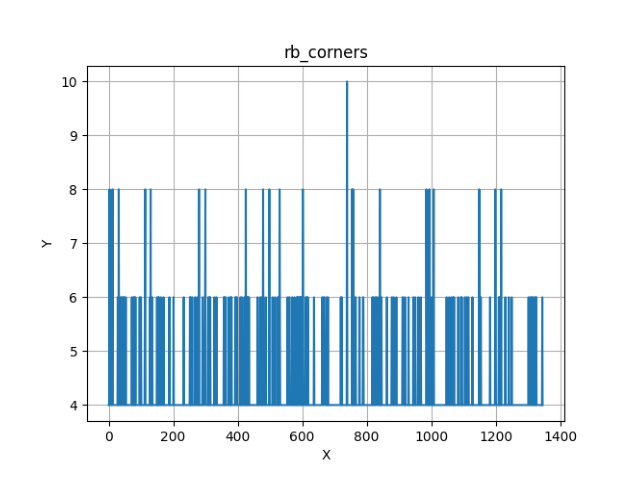

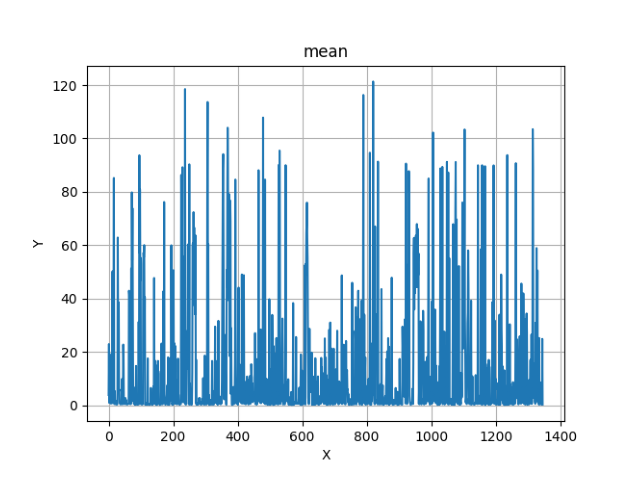

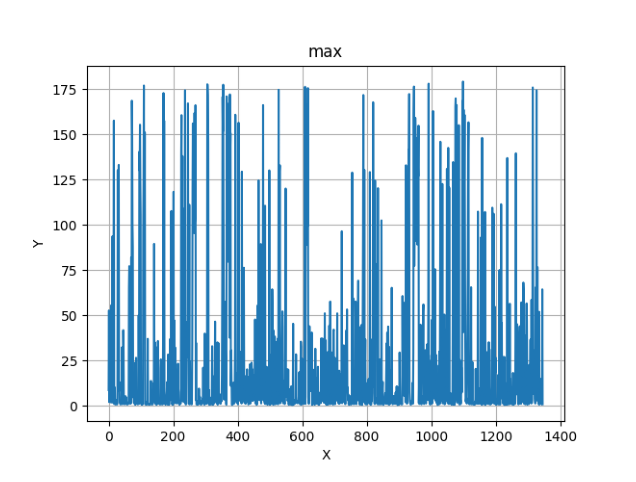

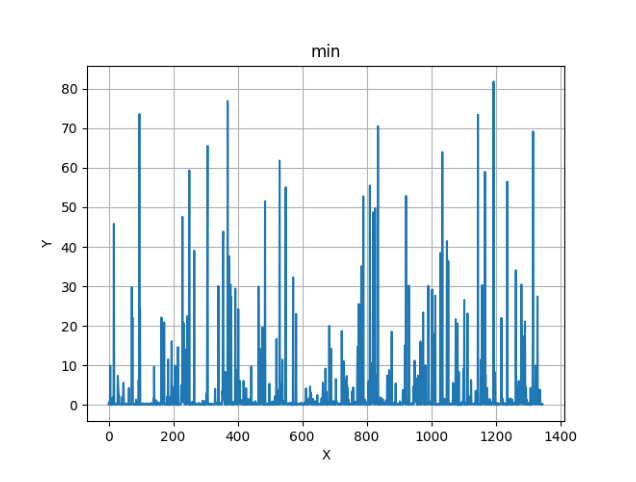

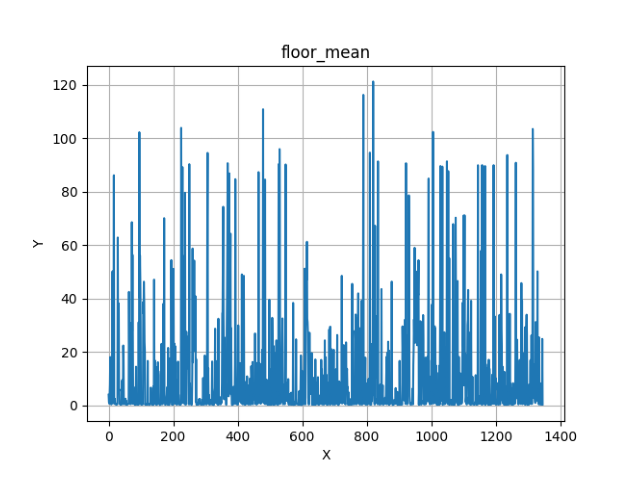

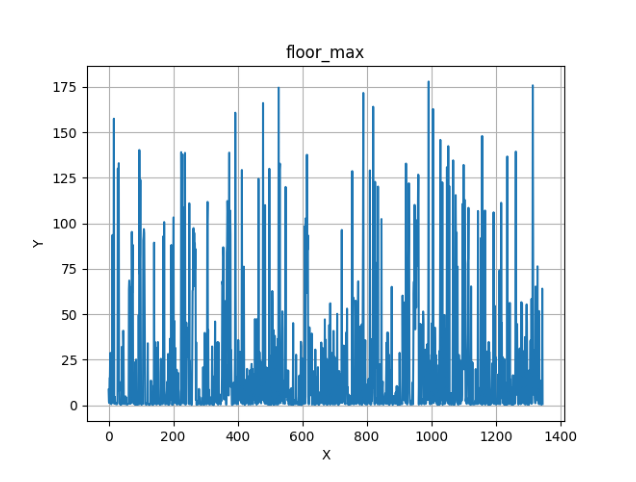

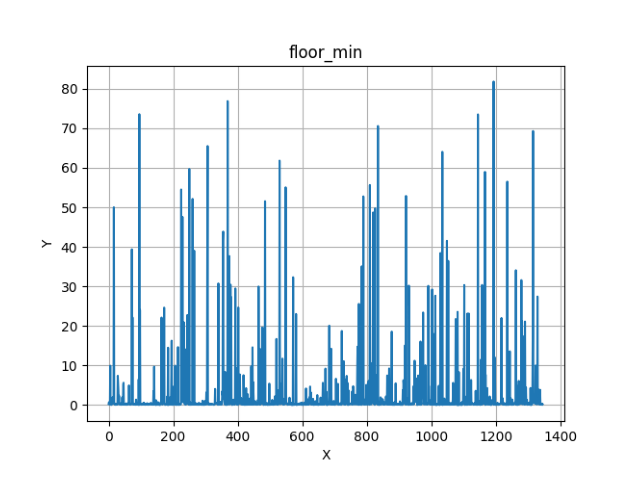

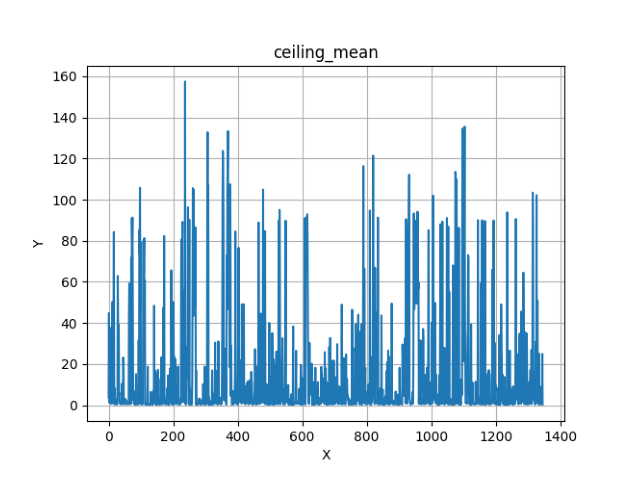

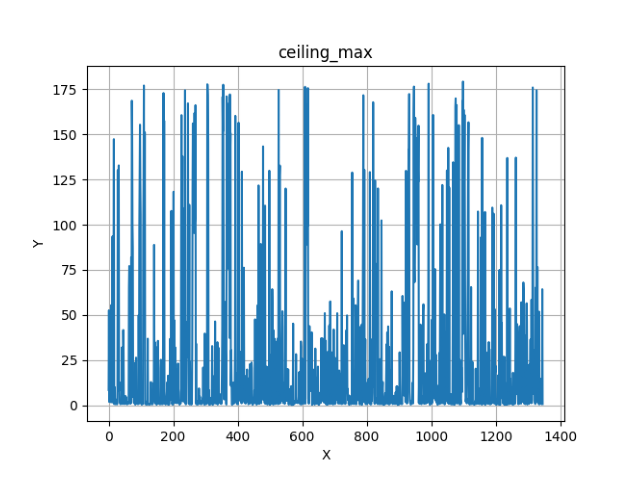

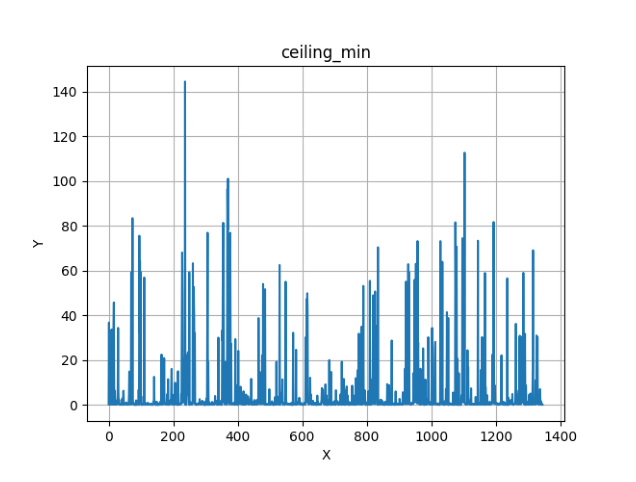

In [2]:
json_url = 'https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json'

# Скачиваем файл JSON
response = requests.get(json_url)
json_file = 'deviation.json'
with open(json_file, 'wb') as file:
    file.write(response.content)

# Создаем графики
paths = draw_plots(json_file)

# Визуализируем графики
for path in paths:
    img = plt.imread(path)
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()